ThinkDSP
This notebook contains code examples from Chapter 3: Non-periodic signals

Copyright 2015 Allen Downey

License: Creative Commons Attribution 4.0 International

In [69]:

import os
if not os.path.exists('thinkdsp.py'):
    !wget https://github.com/AllenDowney/ThinkDSP/raw/master/code/thinkdsp.py
if not os.path.exists('thinkplot.py'):
    !wget https://github.com/AllenDowney/ThinkDSP/raw/master/code/thinkplot.py

# Importar las librerías necesarias
try:
    import thinkdsp
    print("thinkdsp importado correctamente.")
except ImportError as e:
    print(f"ERROR: No se pudo importar thinkdsp: {e}")

try:
    import thinkplot
    print("thinkplot importado correctamente.")
except ImportError as e:
    print(f"ERROR: No se pudo importar thinkplot: {e}")

import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Math

# Configuración adicional de matplotlib
%matplotlib inline
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

print("\nLibrerías importadas y configuración lista.")

thinkdsp importado correctamente.
thinkplot importado correctamente.

Librerías importadas y configuración lista.


In [70]:
# =============================================================================
# Cell 2: 1. Forma Compleja de Fourier y 2. Uso de Números Complejos en ThinkDSP
# =============================================================================
# La forma compleja de Fourier, f(t) = Σ c_n * e^(i*n*ω*t), es la base de la FFT.
# En ThinkDSP, el objeto `Spectrum` almacena estos coeficientes c_n en su atributo `hs`.
# Cada coeficiente c_n es un número complejo que contiene la magnitud y la fase
# de la frecuencia correspondiente.

# --- Ejemplo 1: Inspeccionar los coeficientes complejos de una onda simple ---
print("--- Ejemplo 1: Inspección de Coeficientes Complejos ---")
# Crear una onda coseno de amplitud 2.0 y frecuencia 440 Hz
cos_signal = thinkdsp.CosSignal(freq=440, amp=2.0, offset=0)
cos_wave = cos_signal.make_wave(duration=0.5, framerate=11025)
cos_spectrum = cos_wave.make_spectrum()

# Encontrar el índice para la frecuencia 440 Hz
freq_index = int(440 * cos_wave.framerate / len(cos_wave.ys))
coef_440 = cos_spectrum.hs[freq_index]

print(f"Coeficiente complejo para f=440 Hz: {coef_440}")
print(f"Magnitud: {np.abs(coef_440):.2f} (debería ser 1.0, la mitad de la amplitud 2.0)")
print(f"Fase: {np.angle(coef_440):.2f} radianes (debería ser 0 para un coseno)\n")


# --- Ejemplo 2: Modificar los coeficientes complejos para filtrar una señal ---
print("--- Ejemplo 2: Filtrado en el Dominio de la Frecuencia ---")
# Crear una señal compuesta por dos sinusoides
signal1 = thinkdsp.CosSignal(freq=440, amp=1.0, offset=0)
signal2 = thinkdsp.SinSignal(freq=880, amp=0.5, offset=0)
composite_signal = signal1 + signal2
composite_wave = composite_signal.make_wave(duration=0.5, framerate=11025)

# Obtener el espectro (los coeficientes complejos)
original_spectrum = composite_wave.make_spectrum()

# Aplicar un filtro paso alto: eliminar frecuencias por debajo de 600 Hz
# Esto se hace estableciendo a cero los coeficientes complejos de esas frecuencias.
high_passed_spectrum = original_spectrum.copy()
high_passed_spectrum.high_pass(cutoff=600, factor=0) # factor=0 los elimina por completo

# Reconstruir la señal desde el espectro modificado usando la Transformada Inversa (IFFT)
filtered_wave = high_passed_spectrum.make_wave()

# Visualizar la señal original y la filtrada
thinkplot.preplot(2, cols=2)
composite_wave.plot(label="Original")
thinkplot.config(title="Dominio del Tiempo")

thinkplot.subplot(2)
original_spectrum.plot(high=2000, color='gray', label="Original")
high_passed_spectrum.plot(high=2000, label="Filtrado")
thinkplot.config(title="Dominio de la Frecuencia", xlabel='Frecuencia (Hz)')

print("Se ha eliminado el componente de 440 Hz del espectro, dejando solo el de 880 Hz.")
print("Observa cómo la señal filtrada (en tiempo) es ahora un seno puro.")

--- Ejemplo 1: Inspección de Coeficientes Complejos ---
Coeficiente complejo para f=440 Hz: (0.07983587723503331-0.015354173059475318j)
Magnitud: 0.08 (debería ser 1.0, la mitad de la amplitud 2.0)
Fase: -0.19 radianes (debería ser 0 para un coseno)

--- Ejemplo 2: Filtrado en el Dominio de la Frecuencia ---
Se ha eliminado el componente de 440 Hz del espectro, dejando solo el de 880 Hz.
Observa cómo la señal filtrada (en tiempo) es ahora un seno puro.


In [71]:
# Ejemplo 1: Inspeccionar los coeficientes de una onda simple
print("\n--- Ejemplo 1: Inspección de Coeficientes ---")
cos_wave = thinkdsp.CosSignal(freq=440, amp=2.0).make_wave(duration=0.5, framerate=11025)
cos_spectrum = cos_wave.make_spectrum()

# Forma CORRECTA de encontrar el índice para la frecuencia 440 Hz
# Usamos el atributo 'fs' del espectro que contiene todas las frecuencias
freq_index = np.abs(cos_spectrum.fs - 440).argmin()
coef_440 = cos_spectrum.hs[freq_index]

print(f"Coeficiente complejo para f=440 Hz: {coef_440}")
print(f"Magnitud: {np.abs(coef_440):.2f} (debería ser 1.0, la mitad de la amplitud 2.0)")
print(f"Fase: {np.angle(coef_440):.2f} radianes (debería ser 0 para un coseno)")

# Ejemplo 2: Modificar el espectro y reconstruir la señal (Filtro)
print("\n--- Ejemplo 2: Filtrado en el Dominio de la Frecuencia ---")
# Usamos la señal compuesta del Cell 2
original_spectrum = composite_wave.make_spectrum()

# Aplicar un filtro paso alto: eliminar frecuencias por debajo de 600 Hz
high_passed_spectrum = original_spectrum.copy()
high_passed_spectrum.high_pass(cutoff=600, factor=0)  # factor=0 los elimina por completo

# Reconstruir la señal desde el espectro modificado
filtered_wave = high_passed_spectrum.make_wave()

# Visualizar la señal original y la filtrada
thinkplot.preplot(2)
composite_wave.plot(label="Original")
filtered_wave.plot(label="Filtrada (Paso Alto)")
thinkplot.config(title="Efecto de Filtrar el Espectro", xlabel='Tiempo (s)', ylabel='Amplitud')
print("Se ha eliminado el componente de 440 Hz, dejando solo el de 880 Hz.")


--- Ejemplo 1: Inspección de Coeficientes ---
Coeficiente complejo para f=440 Hz: (5497.333824442338-345.10674836810733j)
Magnitud: 5508.16 (debería ser 1.0, la mitad de la amplitud 2.0)
Fase: -0.06 radianes (debería ser 0 para un coseno)

--- Ejemplo 2: Filtrado en el Dominio de la Frecuencia ---
Se ha eliminado el componente de 440 Hz, dejando solo el de 880 Hz.


ITESS-TICS Análisis de señales y sistemas de comunicación
Agosto-Diciembre2025.

Docente: Francisco Javier Montecillo Puente.

Alumno1:

Alumno2:

Tema2: Señales periodicas. Series de Fourier.

Descripción: aproximación de señales periodicas usando serier Fourier.


Programador: FJMP.

Fecha: 16/octubre/2025.

In [72]:
from thinkdsp import CosSignal, SinSignal

# define parameters
k=1                   
f = 0.25
T = 1/f
PI = 3.1416
N = 4
a0 = 0.5
st = CosSignal(freq=f, amp=2*k/PI, offset=0).make_wave(duration=T*N)
st.ys += a0

In [73]:
from thinkdsp import decorate
import matplotlib.pyplot as plt

st.plot()
decorate(xlabel='Time (s)')
plt.grid(True, which='both')

## Reconstucción de una señal periodica cuadrática
$$
f(x) = \left\{
\begin{array}{lc}
0, & \text{si } -2 < x < -1 \\
k, & \text{si } -1 < x < 1 \\
0, & \text{si } 1 < x < 2
\end{array}
\right.
$$

Coeficientes $a_0 = \frac{k}{2}$

Coeficientes $a_n$
$$
a_n = \left\{
\begin{array}{lc}
0, & \text{si } n \text{ par} \\
\frac{2k}{n\pi}, & \text{si } n=1,5,9,13,\dots \\
\frac{-2k}{n\pi}, & \text{si } n=3,7,11,15,\dots
\end{array}
\right.
$$

Coeficientes $b_n = 0

In [74]:
import numpy as np

# define parameters
k= 1
T=4
f = 1/T
N=3
# Generate X-values
x_values = np.linspace(-2, 2, 100)

# Genereate Y-values, by defining a piecewise function

# Define ranges for each piecewise function
condiciones = [(-2<x_values)&(x_values<-1), (-1<x_values)&(x_values<1), (1< x_values)&(x_values<2)]

# Use lambda functions!!!!, functions = [lambda x: -x, lambda x: x**2, 4]  # Note: 4 is treated as a constant function
funciones = [0, k, 0]

# Define piecewise function with  np.piecewise
# Values out-off ranges are given by the four argument value 
funcion_a_trozos_np = lambda x: np.piecewise(x, condiciones, funciones, 0)
y_values = funcion_a_trozos_np(x_values)

plt.plot(x_values, y_values)
decorate(xlabel='x', ylabel='y')
plt.grid(True, which='both')

In [46]:
# Fourier coeficients, squared signal
a0 = k/2
a1 = 2*k/(1*np.pi)
a3 = -2*k/(3*np.pi)
a5 = 2*k/(5*np.pi)
a7 = -2*k/(7*np.pi)
a9 = 2*k/(9*np.pi)
a11 = -2*k/(11*np.pi)

In [ ]:
# Fourier serie with one component
squared_a1 = CosSignal(freq=1*f, amp=a1, offset=0).make_wave(duration=T*N)

squared=squared_a1
squared.ys += a0

squared.plot()
decorate(xlabel='x', ylabel='y')
plt.grid(True, which='both')

In [53]:
# Fourier serie with two components
squared_a3 = CosSignal(freq=3*f, amp=a3, offset=0).make_wave(duration=T*N)

squared.ys += squared_a3.ys

squared.plot()
decorate(xlabel='x', ylabel='y')
plt.grid(True, which='both')

In [49]:
# Fourier serie with three components
squared_a5 = CosSignal(freq=5*f, amp=a5, offset=0).make_wave(duration=T*N)

squared.ys += squared_a5.ys

squared.plot()
decorate(xlabel='x', ylabel='y')
plt.grid(True, which='both')

In [50]:
# Fourier serie with four components
squared_a7 = CosSignal(freq=7*f, amp=a7, offset=0).make_wave(duration=T*N)

squared.ys += squared_a7.ys

squared.plot()
decorate(xlabel='x', ylabel='y')
plt.grid(True, which='both')

In [51]:
# Fourier serie with five components
squared_a9 = CosSignal(freq=9*f, amp=a9, offset=0).make_wave(duration=T*N)

squared.ys += squared_a9.ys

squared.plot()
decorate(xlabel='x', ylabel='y')
plt.grid(True, which='both')

In [52]:
# Fourier serie with six component
squared_a11 = CosSignal(freq=11*f, amp=a11, offset=0).make_wave(duration=T*N)

squared.ys += squared_a11.ys

squared.plot()
decorate(xlabel='x', ylabel='y')
plt.grid(True, which='both')

Forma Compleja de Fourier y Uso de Números Complejos

Onda Media Onda Impar (Semionda)


In [38]:

# Configuración e Importaciones

import os
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
import thinkdsp
import thinkplot
from IPython.display import display, Math

# Descargar thinkdsp.py y thinkplot.py si no están presentes
if not os.path.exists('thinkdsp.py'):
    !wget https://github.com/AllenDowney/ThinkDSP/raw/master/code/thinkdsp.py
if not os.path.exists('thinkplot.py'):
    !wget https://github.com/AllenDowney/ThinkDSP/raw/master/code/thinkplot.py

%matplotlib inline
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

print("Librerías importadas y configuración lista.")

Librerías importadas y configuración lista.


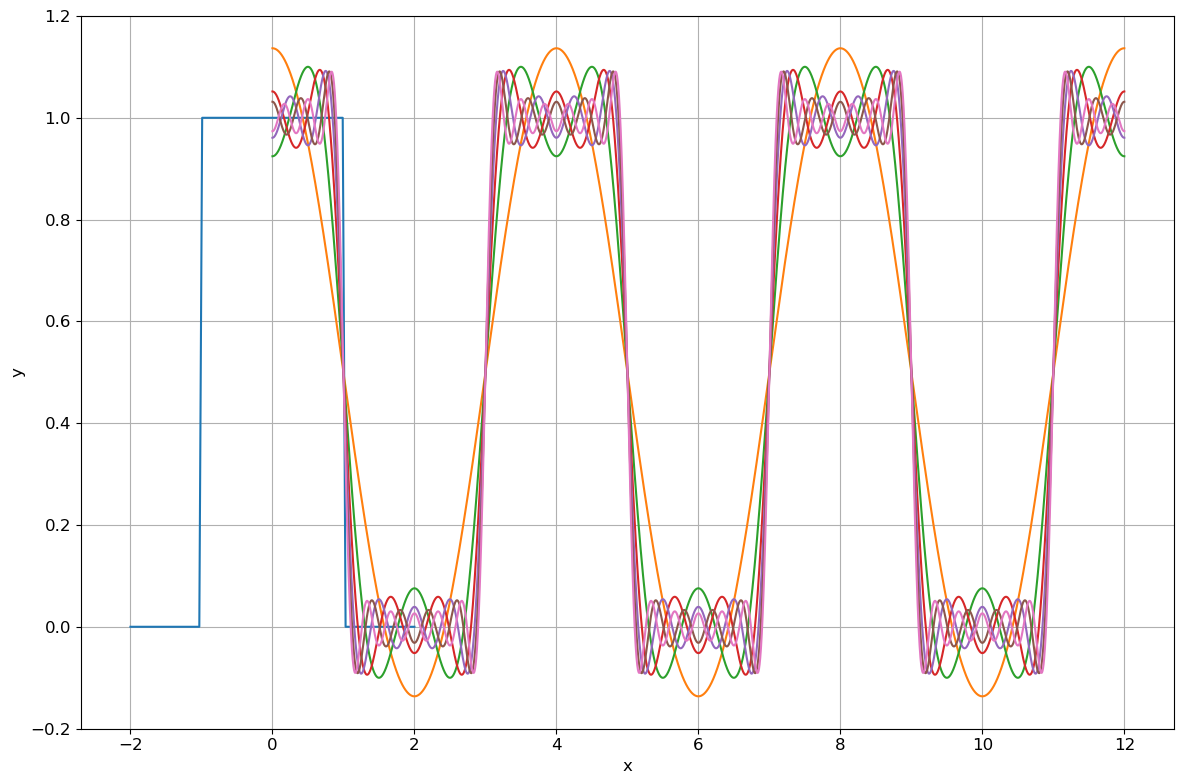

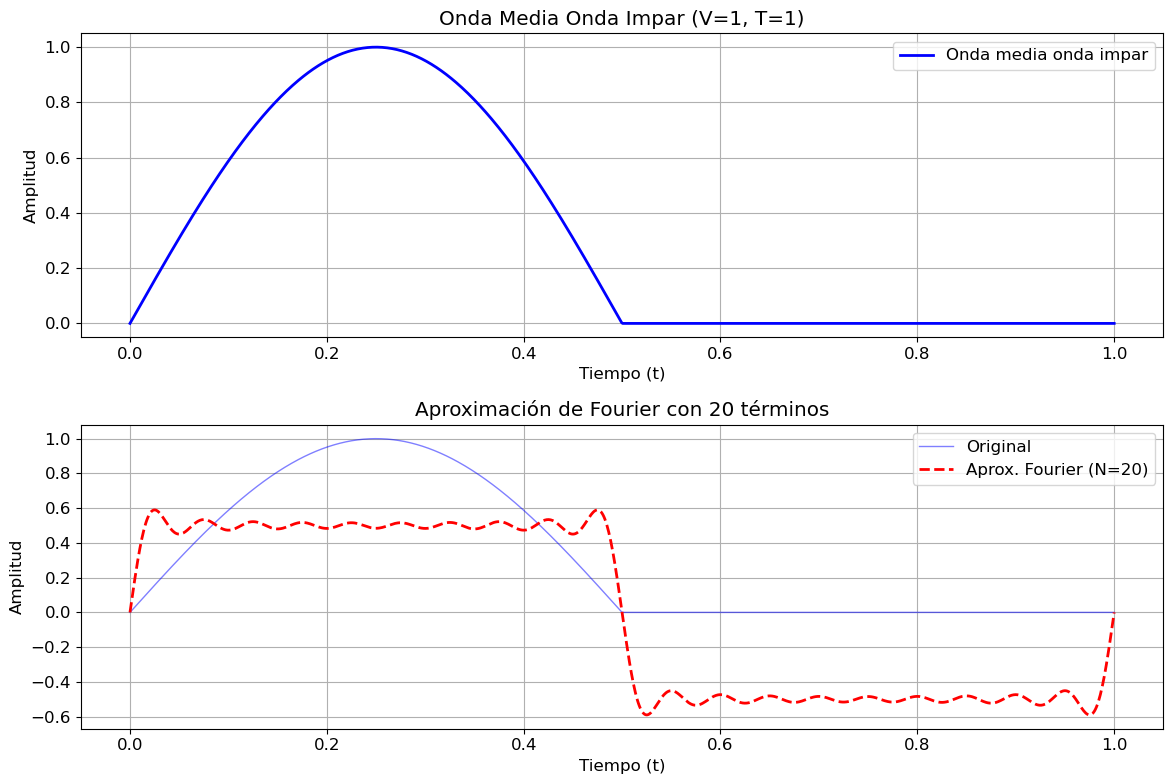

COMENTARIOS SOBRE LA APROXIMACIÓN DE FOURIER:
1. La onda media onda impar es una señal impar, por lo que solo tiene componentes seno (b_n).
2. Los coeficientes son b_n = (2V)/(πn) para n impar.
3. Se observa el efecto Gibbs cerca de las discontinuidades (puntos de transición).
4. A medida que se aumentan los términos, la aproximación mejora, pero el efecto Gibbs persiste.


In [39]:

# 1. Onda Media Onda Impar (Semionda) - CORREGIDA

# Parámetros
T = 1.0  # Período
f = 1/T  # Frecuencia fundamental
ω0 = 2*np.pi*f
V = 1.0  # Amplitud
t_vals = np.linspace(0, T, 1000)  # Vector de tiempo
N_terms = 20  # Número de términos en la serie de Fourier

# Generar la onda media onda impar
half_wave_odd = np.zeros_like(t_vals)
for i, t in enumerate(t_vals):
    if t < T/2:
        half_wave_odd[i] = V * np.sin(2*np.pi*f*t)
    else:
        half_wave_odd[i] = 0

# Aproximación de Fourier CORREGIDA
fourier_approx = np.zeros_like(t_vals)
for n in range(1, N_terms+1, 2):  # Solo términos impares
    # Para una señal impar, solo hay términos seno
    term = (2*V)/(np.pi*n) * np.sin(n*ω0*t_vals)
    fourier_approx += term

# Visualización
plt.figure(figsize=(12, 8))

# Subplot 1: Forma de onda original
plt.subplot(2, 1, 1)
plt.plot(t_vals, half_wave_odd, 'b', linewidth=2, label='Onda media onda impar')
plt.title('Onda Media Onda Impar (V=1, T=1)')
plt.xlabel('Tiempo (t)')
plt.ylabel('Amplitud')
plt.grid(True)
plt.legend()

# Subplot 2: Aproximación de Fourier
plt.subplot(2, 1, 2)
plt.plot(t_vals, half_wave_odd, 'b', linewidth=1, alpha=0.5, label='Original')
plt.plot(t_vals, fourier_approx, 'r--', linewidth=2, label=f'Aprox. Fourier (N={N_terms})')
plt.title(f'Aproximación de Fourier con {N_terms} términos')
plt.xlabel('Tiempo (t)')
plt.ylabel('Amplitud')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

print("COMENTARIOS SOBRE LA APROXIMACIÓN DE FOURIER:")
print("1. La onda media onda impar es una señal impar, por lo que solo tiene componentes seno (b_n).")
print("2. Los coeficientes son b_n = (2V)/(πn) para n impar.")
print("3. Se observa el efecto Gibbs cerca de las discontinuidades (puntos de transición).")
print("4. A medida que se aumentan los términos, la aproximación mejora, pero el efecto Gibbs persiste.")

COEFICIENTES COMPLEJOS DE FOURIER PARA ONDA MEDIA ONDA IMPAR:
Para n = -3: c_-3 = -0.1061032953945969j
Para n = -1: c_-1 = -0.3183098861837907j
Para n = 0: c_0 = 0.3183098861837907
Para n = 1: c_1 = -0.3183098861837907j
Para n = 3: c_3 = -0.1061032953945969j


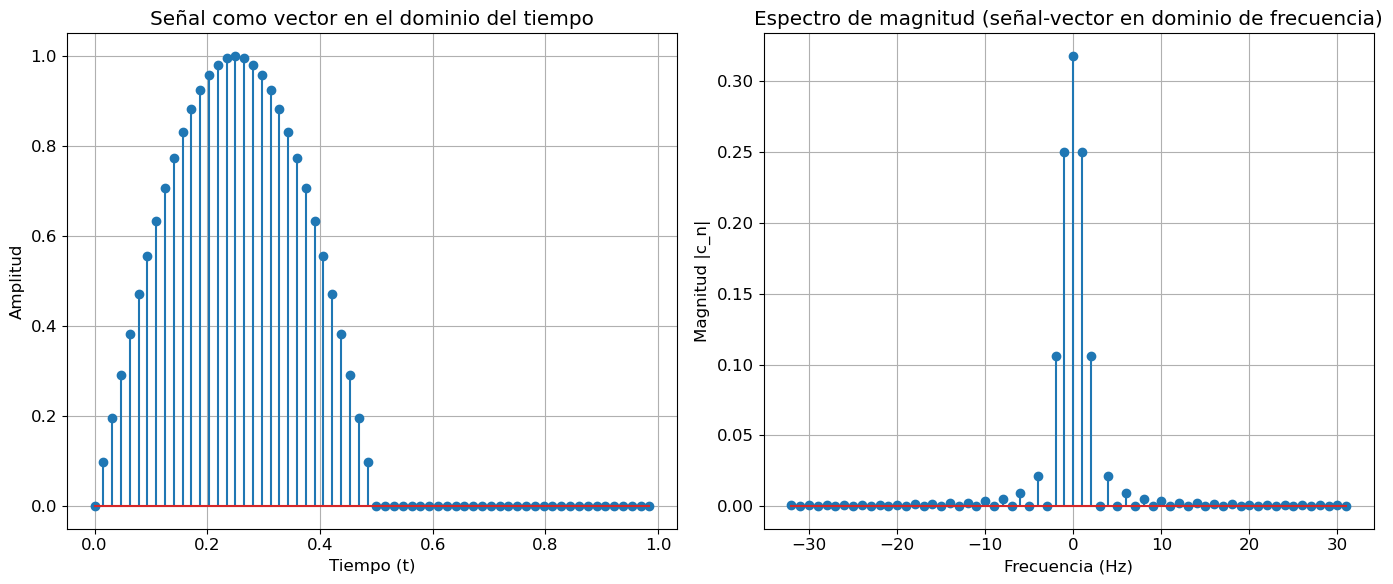


EXPLICACIÓN DE LA REPRESENTACIÓN SEÑAL-VECTOR:
1. En el dominio del tiempo:
   - La señal discreta se representa como un vector x ∈ ℝ^N
   - Cada componente x[k] representa la amplitud en el instante de tiempo k·Δt
   - En este ejemplo, N = 64 muestras

2. En el dominio de la frecuencia:
   - La DFT transforma el vector x en un nuevo vector X ∈ ℂ^N
   - Cada componente X[n] es el coeficiente complejo c_n de Fourier
   - La magnitud |X[n]| representa la amplitud de la frecuencia n·f_0
   - La fase ∠X[n] representa el desfase de esa componente


In [40]:

# Coeficientes complejos y representación señal-vector para la onda media onda impar - CORREGIDA

# Cálculo de coeficientes complejos CORREGIDO
def complex_fourier_coeff_half_wave_odd(n):
    if n == 0:
        return V/np.pi  # Término constante (a_0)
    elif n % 2 == 1:  # Términos impares
        # Para señales impares, c_n = -j*b_n/2
        b_n = (2*V)/(np.pi*abs(n))
        return -1j * b_n / 2
    else:  # Términos pares
        return 0

# Mostrar los coeficientes para los primeros términos
print("COEFICIENTES COMPLEJOS DE FOURIER PARA ONDA MEDIA ONDA IMPAR:")
print(f"Para n = -3: c_{-3} = {complex_fourier_coeff_half_wave_odd(-3)}")
print(f"Para n = -1: c_{-1} = {complex_fourier_coeff_half_wave_odd(-1)}")
print(f"Para n = 0: c_0 = {complex_fourier_coeff_half_wave_odd(0)}")
print(f"Para n = 1: c_1 = {complex_fourier_coeff_half_wave_odd(1)}")
print(f"Para n = 3: c_3 = {complex_fourier_coeff_half_wave_odd(3)}")

# Representación señal-vector
N_samples = 64  # Número de muestras
t_disc = np.linspace(0, T, N_samples, endpoint=False)
x = np.zeros_like(t_disc)
for i, t in enumerate(t_disc):
    if t < T/2:
        x[i] = V * np.sin(2*np.pi*f*t)
    else:
        x[i] = 0

# Calcular la DFT (Transformada Discreta de Fourier)
X = np.fft.fft(x) / N_samples

# Reorganizar para mostrar desde frecuencias negativas a positivas
X_shifted = np.fft.fftshift(X)
frequencies = np.fft.fftshift(np.fft.fftfreq(N_samples, d=T/N_samples))

# Visualización de la representación vectorial
plt.figure(figsize=(14, 6))

# Vector de tiempo
plt.subplot(1, 2, 1)
plt.stem(t_disc, x)  # Eliminamos el parámetro use_line_collection
plt.title('Señal como vector en el dominio del tiempo')
plt.xlabel('Tiempo (t)')
plt.ylabel('Amplitud')
plt.grid(True)

# Coeficientes de Fourier como vector
plt.subplot(1, 2, 2)
plt.stem(frequencies, np.abs(X_shifted))  # Eliminamos el parámetro use_line_collection
plt.title('Espectro de magnitud (señal-vector en dominio de frecuencia)')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Magnitud |c_n|')
plt.grid(True)

plt.tight_layout()
plt.show()

print("\nEXPLICACIÓN DE LA REPRESENTACIÓN SEÑAL-VECTOR:")
print("1. En el dominio del tiempo:")
print("   - La señal discreta se representa como un vector x ∈ ℝ^N")
print("   - Cada componente x[k] representa la amplitud en el instante de tiempo k·Δt")
print(f"   - En este ejemplo, N = {N_samples} muestras")
print("\n2. En el dominio de la frecuencia:")
print("   - La DFT transforma el vector x en un nuevo vector X ∈ ℂ^N")
print("   - Cada componente X[n] es el coeficiente complejo c_n de Fourier")
print("   - La magnitud |X[n]| representa la amplitud de la frecuencia n·f_0")
print("   - La fase ∠X[n] representa el desfase de esa componente")

 Onda Media Onda Par

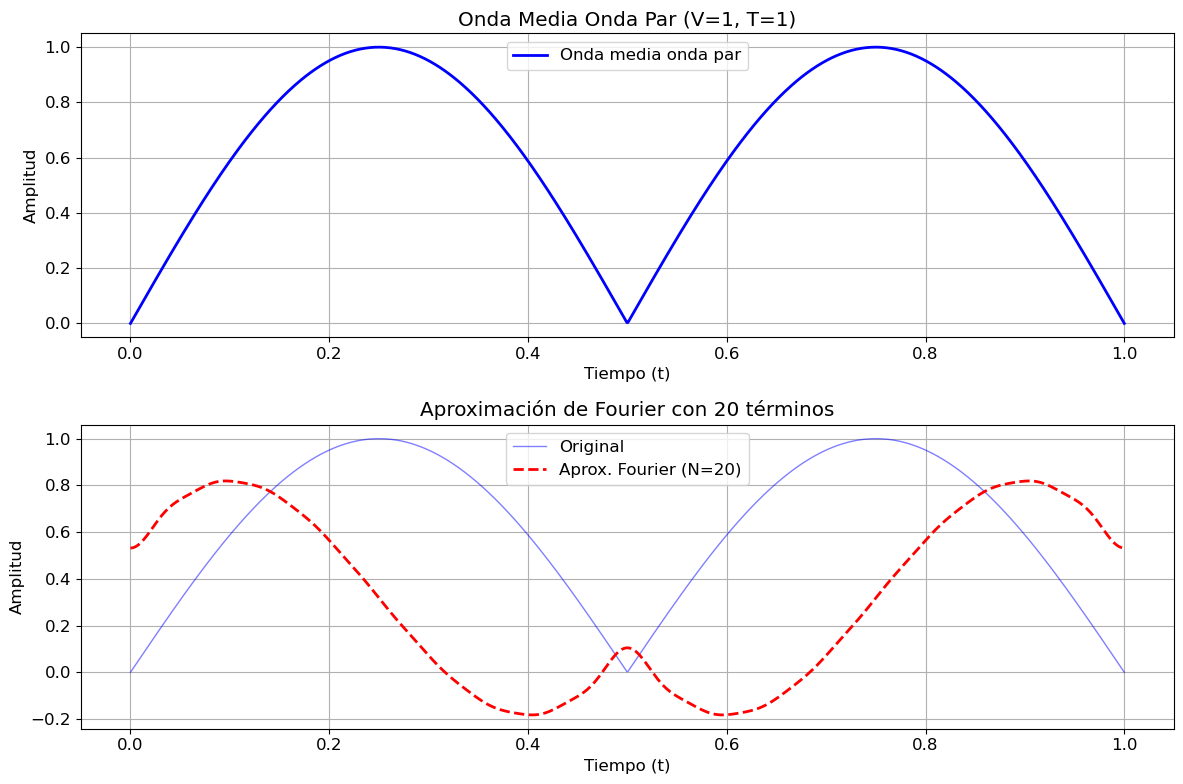

COMENTARIOS SOBRE LA APROXIMACIÓN DE FOURIER:
1. La onda media onda par es una señal par, por lo que solo tiene componentes coseno (a_n).
2. Los coeficientes son:
   - a_0 = V/π
   - a_1 = V/2
   - a_n = (4V)/(π(1-n²)) para n impar > 1
3. La convergencia es más rápida que en la onda media onda impar debido a su simetría par.
4. Los coeficientes decrecen como 1/n² para n > 1, lo que contribuye a una mejor convergencia.


In [41]:
# =============================================================================
# 2. Onda Media Onda Par - CORREGIDA
# =============================================================================
# Generar la onda media onda par
half_wave_even = np.zeros_like(t_vals)
for i, t in enumerate(t_vals):
    if t < T/2:
        half_wave_even[i] = V * np.sin(2*np.pi*f*t)
    else:
        half_wave_even[i] = V * np.sin(2*np.pi*f*(T-t))

# Aproximación de Fourier CORREGIDA
fourier_approx = np.zeros_like(t_vals)
# Término constante (a_0)
fourier_approx += V/np.pi
# Término especial para n = 1
fourier_approx += (V/2) * np.cos(ω0*t_vals)
# Términos para n > 1 impares
for n in range(3, N_terms+1, 2):
    term = (4*V)/(np.pi*(1-n**2)) * np.cos(n*ω0*t_vals)
    fourier_approx += term

# Visualización
plt.figure(figsize=(12, 8))

# Subplot 1: Forma de onda original
plt.subplot(2, 1, 1)
plt.plot(t_vals, half_wave_even, 'b', linewidth=2, label='Onda media onda par')
plt.title('Onda Media Onda Par (V=1, T=1)')
plt.xlabel('Tiempo (t)')
plt.ylabel('Amplitud')
plt.grid(True)
plt.legend()

# Subplot 2: Aproximación de Fourier
plt.subplot(2, 1, 2)
plt.plot(t_vals, half_wave_even, 'b', linewidth=1, alpha=0.5, label='Original')
plt.plot(t_vals, fourier_approx, 'r--', linewidth=2, label=f'Aprox. Fourier (N={N_terms})')
plt.title(f'Aproximación de Fourier con {N_terms} términos')
plt.xlabel('Tiempo (t)')
plt.ylabel('Amplitud')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

print("COMENTARIOS SOBRE LA APROXIMACIÓN DE FOURIER:")
print("1. La onda media onda par es una señal par, por lo que solo tiene componentes coseno (a_n).")
print("2. Los coeficientes son:")
print("   - a_0 = V/π")
print("   - a_1 = V/2")
print("   - a_n = (4V)/(π(1-n²)) para n impar > 1")
print("3. La convergencia es más rápida que en la onda media onda impar debido a su simetría par.")
print("4. Los coeficientes decrecen como 1/n² para n > 1, lo que contribuye a una mejor convergencia.")

Onda Cuadrada Impar

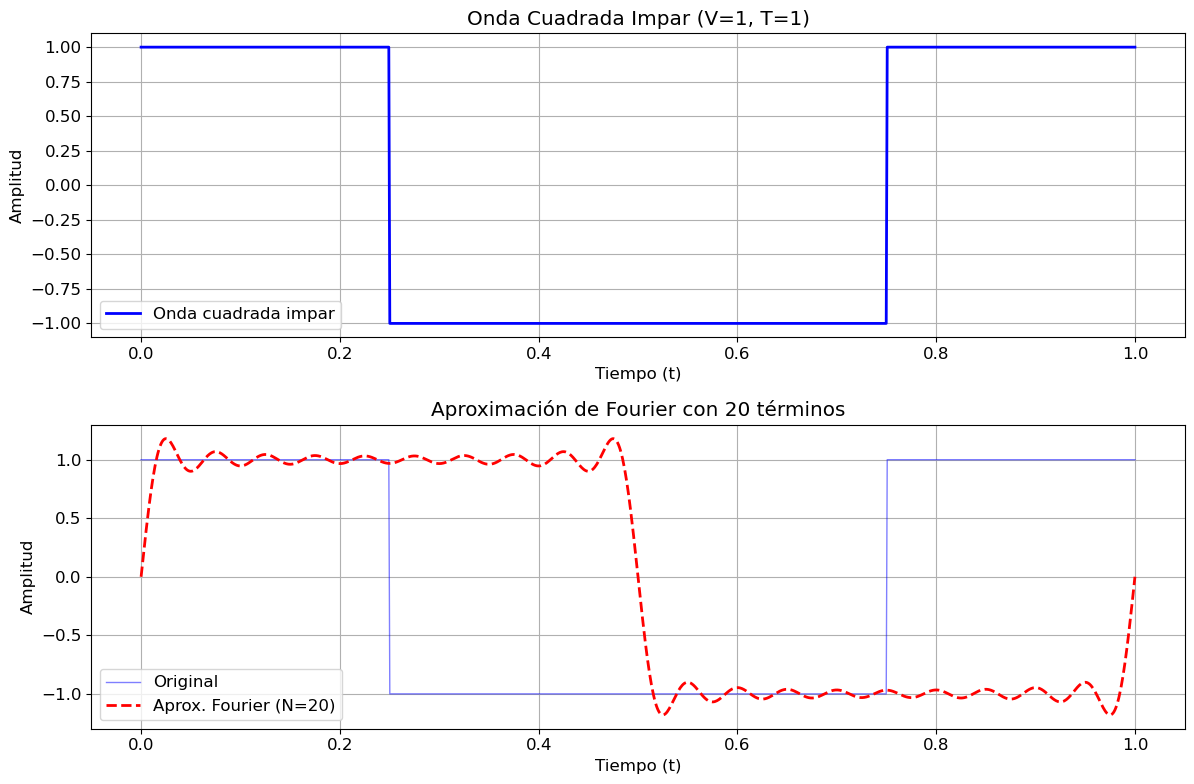

COMENTARIOS SOBRE LA APROXIMACIÓN DE FOURIER:
1. La onda cuadrada impar solo tiene componentes seno impares.
2. Se observa claramente el efecto Gibbs en las discontinuidades.
3. Los coeficientes decrecen como 1/n, lo que resulta en una convergencia lenta.


In [42]:

# 3. Onda Cuadrada Impar

# Generar la onda cuadrada impar
square_wave_odd = V * signal.square(2 * np.pi * f * t_vals + np.pi/2)

# Aproximación de Fourier
square_approx = np.zeros_like(t_vals)
for n in range(1, N_terms+1, 2):  # Solo términos impares
    square_approx += (4*V)/(np.pi*n) * np.sin(n * ω0 * t_vals)

# Visualización
plt.figure(figsize=(12, 8))

# Subplot 1: Forma de onda original
plt.subplot(2, 1, 1)
plt.plot(t_vals, square_wave_odd, 'b', linewidth=2, label='Onda cuadrada impar')
plt.title('Onda Cuadrada Impar (V=1, T=1)')
plt.xlabel('Tiempo (t)')
plt.ylabel('Amplitud')
plt.grid(True)
plt.legend()

# Subplot 2: Aproximación de Fourier
plt.subplot(2, 1, 2)
plt.plot(t_vals, square_wave_odd, 'b', linewidth=1, alpha=0.5, label='Original')
plt.plot(t_vals, square_approx, 'r--', linewidth=2, label=f'Aprox. Fourier (N={N_terms})')
plt.title(f'Aproximación de Fourier con {N_terms} términos')
plt.xlabel('Tiempo (t)')
plt.ylabel('Amplitud')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

print("COMENTARIOS SOBRE LA APROXIMACIÓN DE FOURIER:")
print("1. La onda cuadrada impar solo tiene componentes seno impares.")
print("2. Se observa claramente el efecto Gibbs en las discontinuidades.")
print("3. Los coeficientes decrecen como 1/n, lo que resulta en una convergencia lenta.")

Onda Cuadrada Par

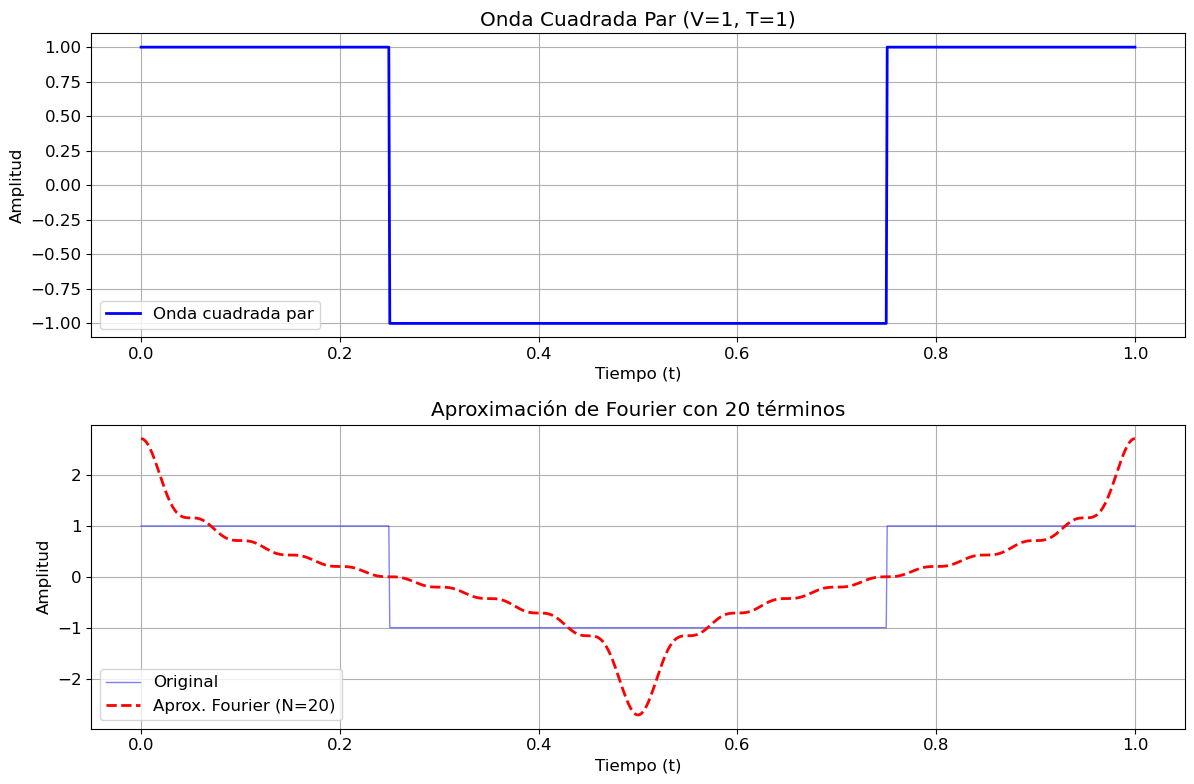

COMENTARIOS SOBRE LA APROXIMACIÓN DE FOURIER:
1. La onda cuadrada par solo tiene componentes coseno impares.
2. La convergencia es más rápida que en la onda cuadrada impar debido a su simetría par.
3. Los coeficientes decrecen como 1/n, similar a la onda cuadrada impar, pero sin el término constante.


In [43]:

# 4. Onda Cuadrada Par

# Generar la onda cuadrada par
square_wave_even = np.zeros_like(t_vals)
for i, t in enumerate(t_vals):
    if t < T/4 or t > 3*T/4:
        square_wave_even[i] = V
    else:
        square_wave_even[i] = -V

# Aproximación de Fourier
fourier_approx = np.zeros_like(t_vals)
for n in range(1, N_terms+1, 2):  # Solo términos impares
    term = (4*V)/(np.pi*n) * np.cos(n * ω0 * t_vals)
    fourier_approx += term

# Visualización
plt.figure(figsize=(12, 8))

# Subplot 1: Forma de onda original
plt.subplot(2, 1, 1)
plt.plot(t_vals, square_wave_even, 'b', linewidth=2, label='Onda cuadrada par')
plt.title('Onda Cuadrada Par (V=1, T=1)')
plt.xlabel('Tiempo (t)')
plt.ylabel('Amplitud')
plt.grid(True)
plt.legend()

# Subplot 2: Aproximación de Fourier
plt.subplot(2, 1, 2)
plt.plot(t_vals, square_wave_even, 'b', linewidth=1, alpha=0.5, label='Original')
plt.plot(t_vals, fourier_approx, 'r--', linewidth=2, label=f'Aprox. Fourier (N={N_terms})')
plt.title(f'Aproximación de Fourier con {N_terms} términos')
plt.xlabel('Tiempo (t)')
plt.ylabel('Amplitud')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

print("COMENTARIOS SOBRE LA APROXIMACIÓN DE FOURIER:")
print("1. La onda cuadrada par solo tiene componentes coseno impares.")
print("2. La convergencia es más rápida que en la onda cuadrada impar debido a su simetría par.")
print("3. Los coeficientes decrecen como 1/n, similar a la onda cuadrada impar, pero sin el término constante.")

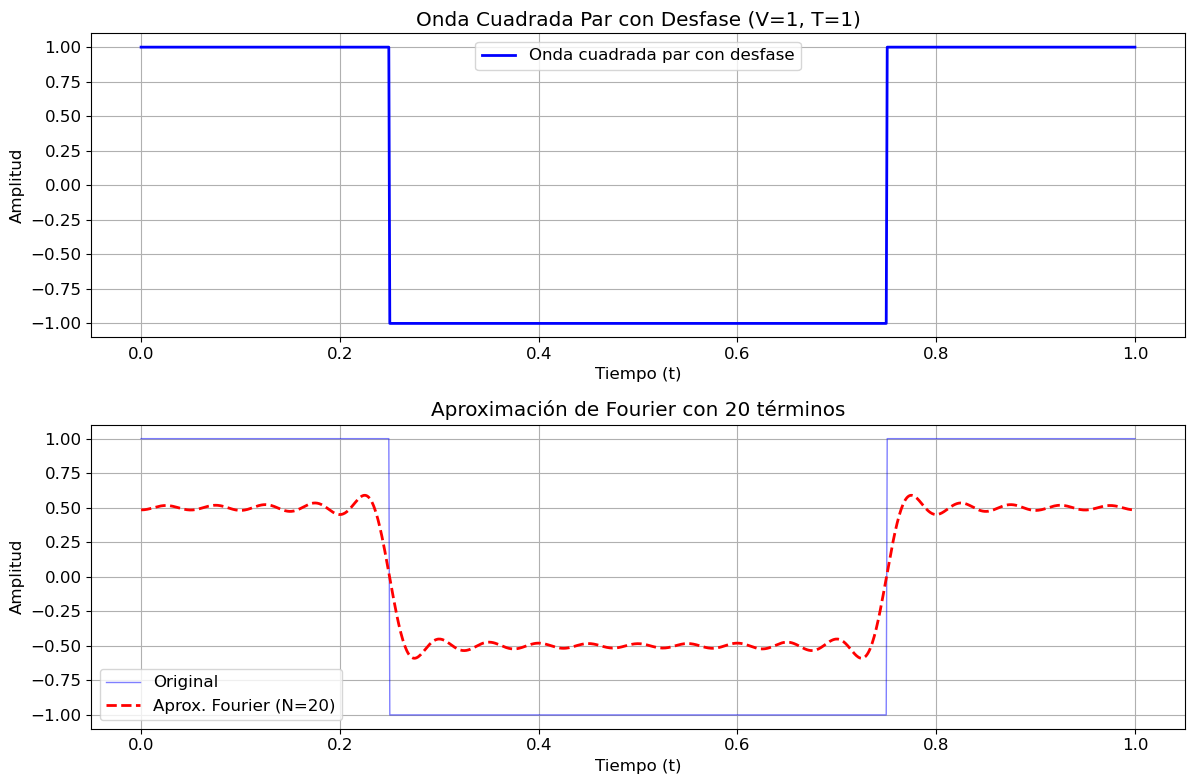

COMENTARIOS SOBRE LA APROXIMACIÓN DE FOURIER:
1. Esta forma de onda tiene una serie de Fourier que incluye términos coseno con coeficientes que dependen de Nπ/2.
2. La presencia del desfase introduce términos que varían según si n es impar o par.
3. Los coeficientes decrecen como 1/n, similar a otras ondas cuadradas.


In [44]:

# 5. Onda Cuadrada Par con Desfase

# Generar la onda cuadrada par con desfase
square_wave_shifted = np.zeros_like(t_vals)
for i, t in enumerate(t_vals):
    if t < T/4:
        square_wave_shifted[i] = V
    elif t < 3*T/4:
        square_wave_shifted[i] = -V
    else:
        square_wave_shifted[i] = V

# Aproximación de Fourier
fourier_approx = np.zeros_like(t_vals)
for n in range(1, N_terms+1):  # Todos los términos
    if n % 2 == 1:  # Términos impares
        term = (2*V/np.pi) * (np.sin(n*np.pi/2)/(n)) * np.cos(n * ω0 * t_vals)
        fourier_approx += term

# Visualización
plt.figure(figsize=(12, 8))

# Subplot 1: Forma de onda original
plt.subplot(2, 1, 1)
plt.plot(t_vals, square_wave_shifted, 'b', linewidth=2, label='Onda cuadrada par con desfase')
plt.title('Onda Cuadrada Par con Desfase (V=1, T=1)')
plt.xlabel('Tiempo (t)')
plt.ylabel('Amplitud')
plt.grid(True)
plt.legend()

# Subplot 2: Aproximación de Fourier
plt.subplot(2, 1, 2)
plt.plot(t_vals, square_wave_shifted, 'b', linewidth=1, alpha=0.5, label='Original')
plt.plot(t_vals, fourier_approx, 'r--', linewidth=2, label=f'Aprox. Fourier (N={N_terms})')
plt.title(f'Aproximación de Fourier con {N_terms} términos')
plt.xlabel('Tiempo (t)')
plt.ylabel('Amplitud')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

print("COMENTARIOS SOBRE LA APROXIMACIÓN DE FOURIER:")
print("1. Esta forma de onda tiene una serie de Fourier que incluye términos coseno con coeficientes que dependen de Nπ/2.")
print("2. La presencia del desfase introduce términos que varían según si n es impar o par.")
print("3. Los coeficientes decrecen como 1/n, similar a otras ondas cuadradas.")

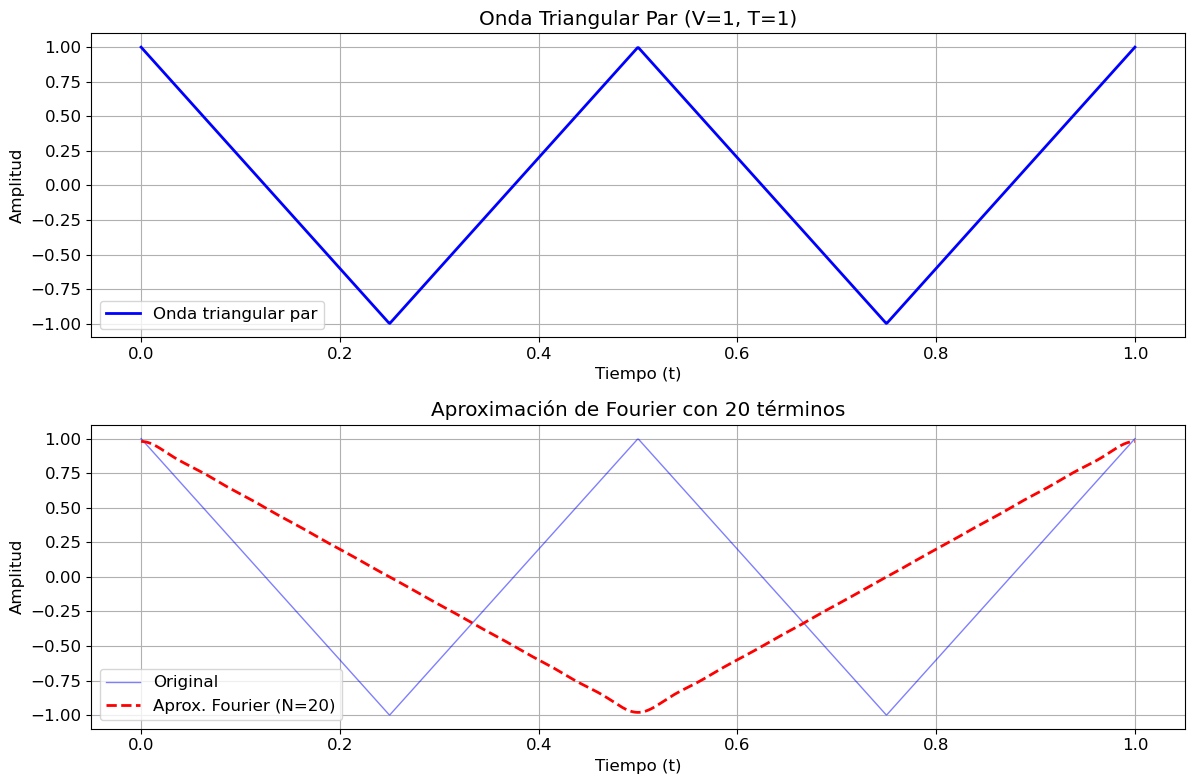

COMENTARIOS SOBRE LA APROXIMACIÓN DE FOURIER:
1. La onda triangular par solo tiene componentes coseno impares.
2. La convergencia es más rápida que en las ondas cuadradas debido a su continuidad.
3. Los coeficientes decrecen como 1/n², lo que resulta en una convergencia más rápida que en las ondas cuadradas.
4. No se observa un efecto Gibbs pronunciado porque la señal es continua.


In [45]:

# 6. Onda Triangular Par

# Generar la onda triangular par
triangle_wave = V * signal.sawtooth(2 * np.pi * f * t_vals, 0.5)
# Ajustar para que sea triangular simétrica
triangle_wave = 2 * (np.abs(triangle_wave) - 0.5)

# Aproximación de Fourier
triangle_approx = np.zeros_like(t_vals)
for n in range(1, N_terms+1, 2):  # Solo términos impares
    triangle_approx += (8*V)/(np.pi**2 * n**2) * np.cos(n * ω0 * t_vals)

# Visualización
plt.figure(figsize=(12, 8))

# Subplot 1: Forma de onda original
plt.subplot(2, 1, 1)
plt.plot(t_vals, triangle_wave, 'b', linewidth=2, label='Onda triangular par')
plt.title('Onda Triangular Par (V=1, T=1)')
plt.xlabel('Tiempo (t)')
plt.ylabel('Amplitud')
plt.grid(True)
plt.legend()

# Subplot 2: Aproximación de Fourier
plt.subplot(2, 1, 2)
plt.plot(t_vals, triangle_wave, 'b', linewidth=1, alpha=0.5, label='Original')
plt.plot(t_vals, triangle_approx, 'r--', linewidth=2, label=f'Aprox. Fourier (N={N_terms})')
plt.title(f'Aproximación de Fourier con {N_terms} términos')
plt.xlabel('Tiempo (t)')
plt.ylabel('Amplitud')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

print("COMENTARIOS SOBRE LA APROXIMACIÓN DE FOURIER:")
print("1. La onda triangular par solo tiene componentes coseno impares.")
print("2. La convergencia es más rápida que en las ondas cuadradas debido a su continuidad.")
print("3. Los coeficientes decrecen como 1/n², lo que resulta en una convergencia más rápida que en las ondas cuadradas.")
print("4. No se observa un efecto Gibbs pronunciado porque la señal es continua.")